In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
dengue = pd.read_csv('C:/Users/KiIM/Music/dengue.csv')

In [3]:
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


<h1>Insight 1: Top 10 Regions by Dengue Deaths</h1>
<h1>Regions experiencing the highest number of deaths aren’t always those with the most dengue cases, which may point to issues like limited healthcare access or delays in receiving proper treatment. Strengthening medical facilities and speeding up diagnostic processes in these areas could help reduce fatalities.</h1>

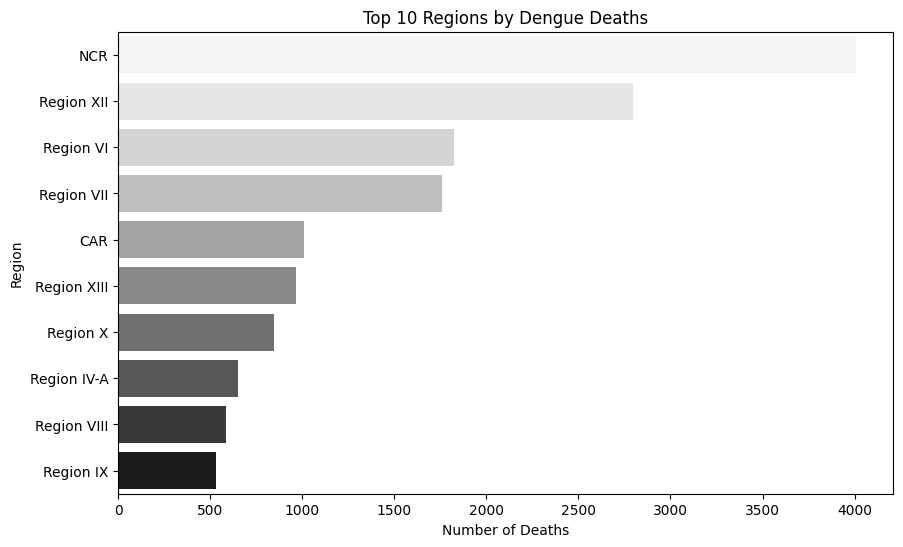

In [4]:
r_deaths = dengue.groupby('Region')['Dengue_Deaths'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(y=r_deaths.index, x=r_deaths.values, palette='Greys', color='black')
plt.title('Top 10 Regions by Dengue Deaths')
plt.xlabel('Number of Deaths')
plt.ylabel('Region')
plt.show()

<h1>Insight 2: Case Fatality Ratio by Region</h1>
<h1>In some areas, fatality rates are disproportionately high compared to the number of reported cases, which may reflect issues like slow access to medical services or a lack of reporting for mild infections. Identifying these patterns is essential for prioritizing healthcare training and distributing emergency support where it's needed most.</h1>

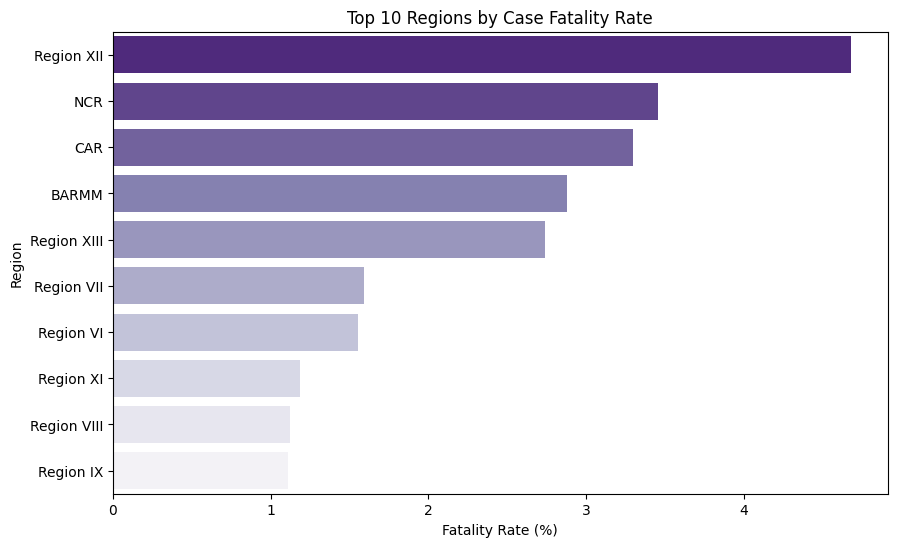

In [5]:
fatal = dengue.groupby('Region')[['Dengue_Cases', 'Dengue_Deaths']].sum()
fatal['Fatality_Rate (%)'] = (fatal['Dengue_Deaths'] / fatal['Dengue_Cases']) * 100
fatal= fatal.sort_values('Fatality_Rate (%)', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x='Fatality_Rate (%)', y=fatal.index, data=fatal, palette='Purples_r')
plt.title('Top 10 Regions by Case Fatality Rate')
plt.xlabel('Fatality Rate (%)')
plt.ylabel('Region')
plt.show()

<h1>Insight 3: Yearly Increase or Decrease in Infection Numbers</h1>
<h1>An upward value shows an increase in cases compared to the prior year, while a downward value reflects a reduction. This helps assess how effective dengue control measures have been over the years.</h1>

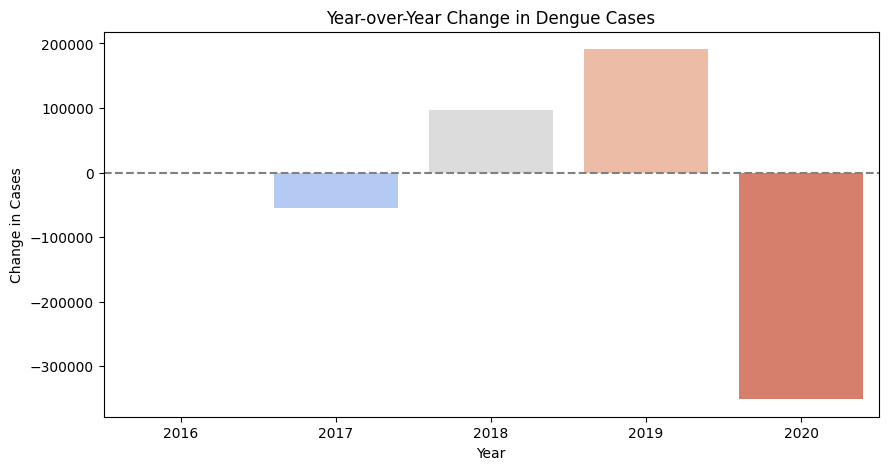

In [6]:
y_cases = dengue.groupby('Year')['Dengue_Cases'].sum()
difference = y_cases.diff().fillna(0)

plt.figure(figsize=(10,5))
sns.barplot(x=difference.index, y=difference.values, palette='coolwarm')
plt.title('Year-over-Year Change in Dengue Cases')
plt.xlabel('Year')
plt.ylabel('Change in Cases')
plt.axhline(0, color='gray', linestyle='--')
plt.show()

<h1>Insight 4: Regional Comparison of Dengue Cases</h1>
<h1>Aggregating case numbers by region helps identify the areas most and least impacted, providing valuable insight for directing focused healthcare interventions.</h1>

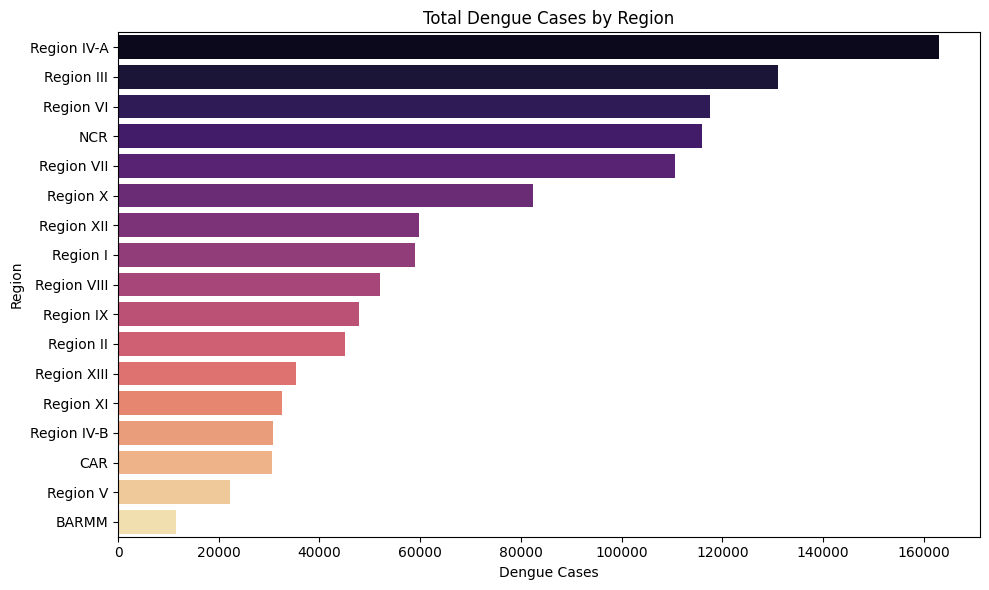

In [7]:
region_cases = dengue.groupby('Region')['Dengue_Cases'].sum().reset_index().sort_values(by='Dengue_Cases', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(y='Region', x='Dengue_Cases', data=region_cases, palette='magma')
plt.title("Total Dengue Cases by Region")
plt.xlabel("Dengue Cases")
plt.ylabel("Region")
plt.tight_layout()
plt.show()

<h1>Insight 5: Monthly Dengue Deaths Across Years</h1>

<h1>July to September confirmed the dengue peak period, having 62% of deaths. While January to April is having a lower-risk period for only 7.5% of deaths.</h1>

In [8]:
mddistribution = dengue.groupby("Month")["Dengue_Deaths"].describe()

In [9]:
mddistribution

,count,mean,std,min,25%,50%,75%,max
Month,,,,,,,,
April,85.0,2.352941,3.046098,0.0,0.0,1.0,3.0,16.0
August,85.0,8.400000,9.673479,0.0,2.0,4.0,11.0,54.0
December,85.0,4.752941,5.857242,0.0,1.0,2.0,6.0,26.0
February,85.0,3.705882,3.728346,0.0,1.0,3.0,5.0,18.0
January,85.0,4.635294,4.888877,0.0,1.0,3.0,6.0,28.0
July,85.0,7.188235,7.849013,0.0,2.0,5.0,12.0,48.0
June,85.0,3.788235,4.726053,0.0,1.0,2.0,5.0,31.0
March,85.0,3.423529,3.701275,0.0,1.0,2.0,4.0,19.0
May,85.0,1.905882,2.152648,0.0,0.0,1.0,3.0,9.0


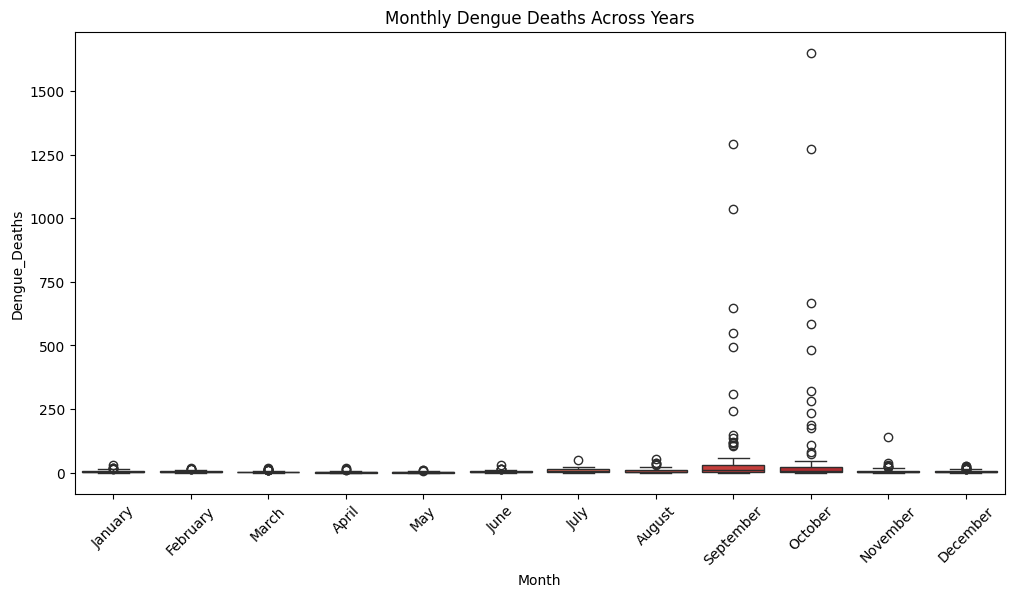

In [10]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=dengue, x="Month", y="Dengue_Deaths", palette="Reds")
plt.xticks(rotation=45)
plt.title("Monthly Dengue Deaths Across Years")
plt.show()

<h1>Insight 6: Correlation Between Dengue Cases</h1>

In [11]:
correlation_value = dengue[["Dengue_Cases", "Dengue_Deaths"]].corr().iloc[0, 1]

In [12]:
correlation_value

np.float64(0.038322137204194966)

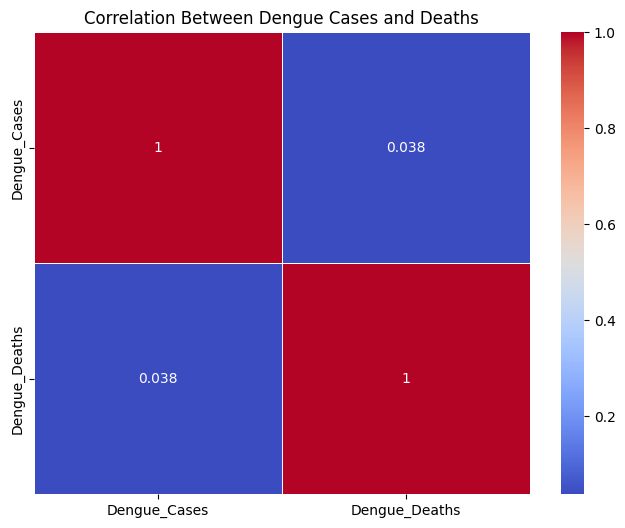

In [13]:
plt.figure(figsize=(8, 6))
sns.heatmap(dengue[["Dengue_Cases", "Dengue_Deaths"]].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Between Dengue Cases and Deaths")
plt.show()

<h1>Insight 7: Distribution of Dengue Cases</h1> 
<h1>This pattern suggests that while dengue is widespread, large-scale outbreaks are less frequent. Understanding this distribution helps public health officials prepare for both common low-intensity outbreaks and rarer, high-intensity surges.</h1>

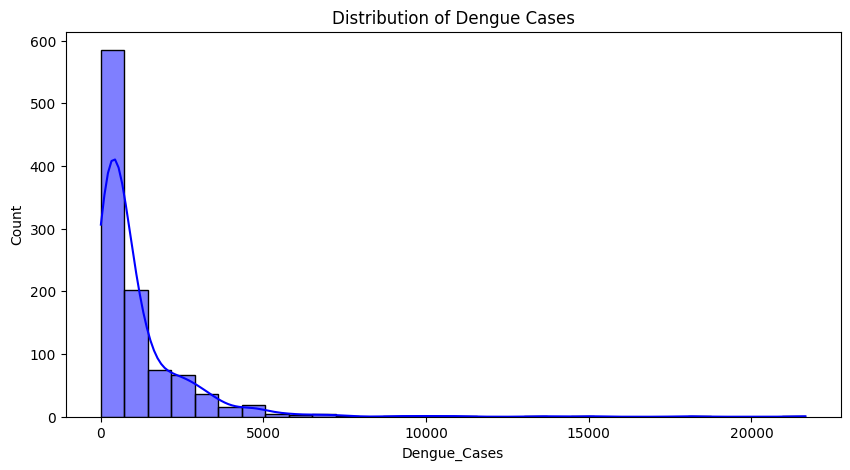

In [14]:
plt.figure(figsize=(10, 5))
sns.histplot(dengue["Dengue_Cases"], bins=30, kde=True, color="blue")
plt.title("Distribution of Dengue Cases")
plt.show()

<h1>Insight 8: Distribution of Dengue Deaths</h1>
<h1>This distribution emphasizes that while dengue is widespread, fatalities are relatively uncommon. However, the presence of high-death outliers signals the need for preparedness in specific hotspots, especially during peak outbreak periods.</h1>

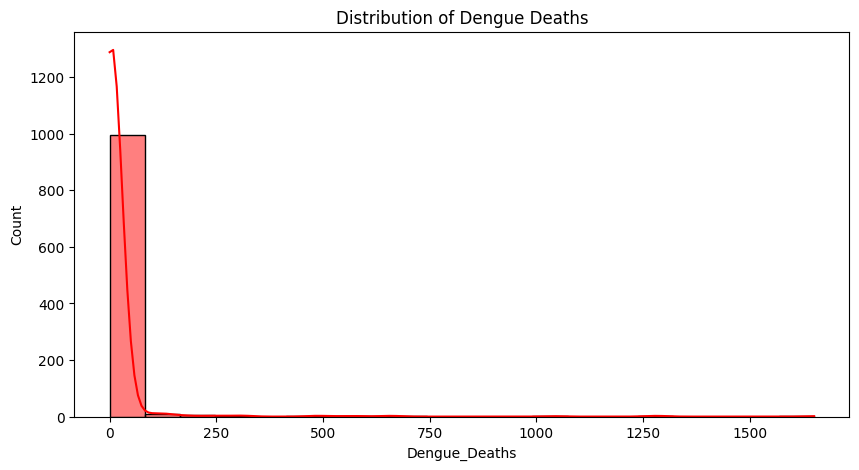

In [15]:
plt.figure(figsize=(10, 5))
sns.histplot(dengue["Dengue_Deaths"], bins=20, kde=True, color="red")
plt.title("Distribution of Dengue Deaths")
plt.show()

<h1>Insight 9: Monthly Dengue Cases by Region</h1>
<h1>This visualization is valuable for both temporal and geographic targeting of dengue interventions. It suggests that prevention efforts should ramp up ahead of peak months and be tailored to regions with historically higher or more variable case counts.</h1>

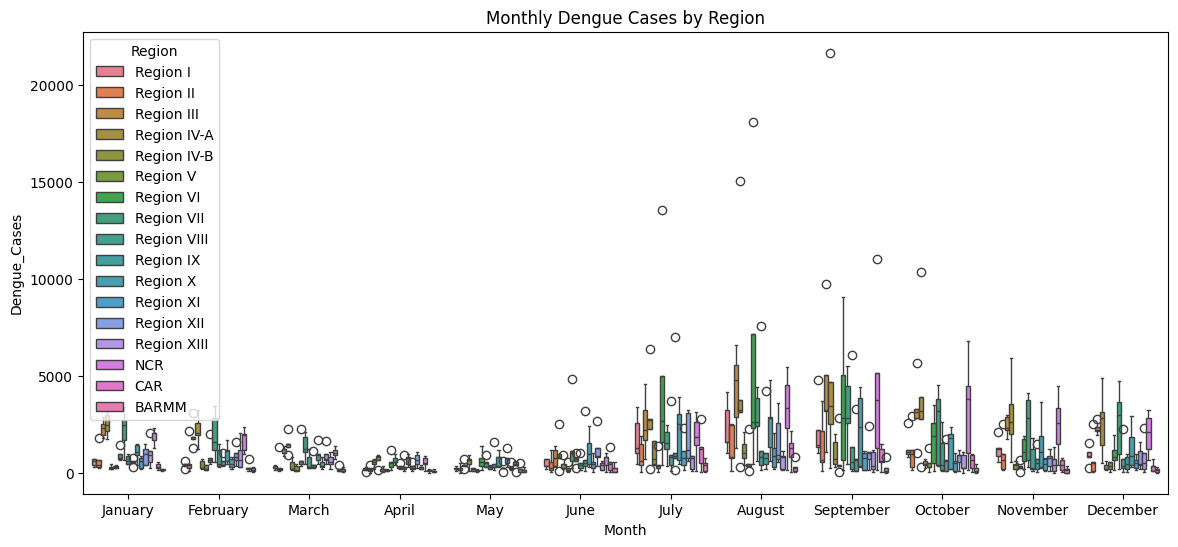

In [16]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=dengue, x="Month", y="Dengue_Cases", hue="Region")
plt.title("Monthly Dengue Cases by Region")
plt.show()

<h1>Insight 10: Yearly Dengue Cases by Region</h1>
<h1>This visualization helps public health officials understand both long-term regional risk and annual outbreak patterns. Regions that consistently experience high or erratic case numbers over the years should be prioritized for sustained intervention, while yearly trends can inform when to deploy resources most effectively.</h1>

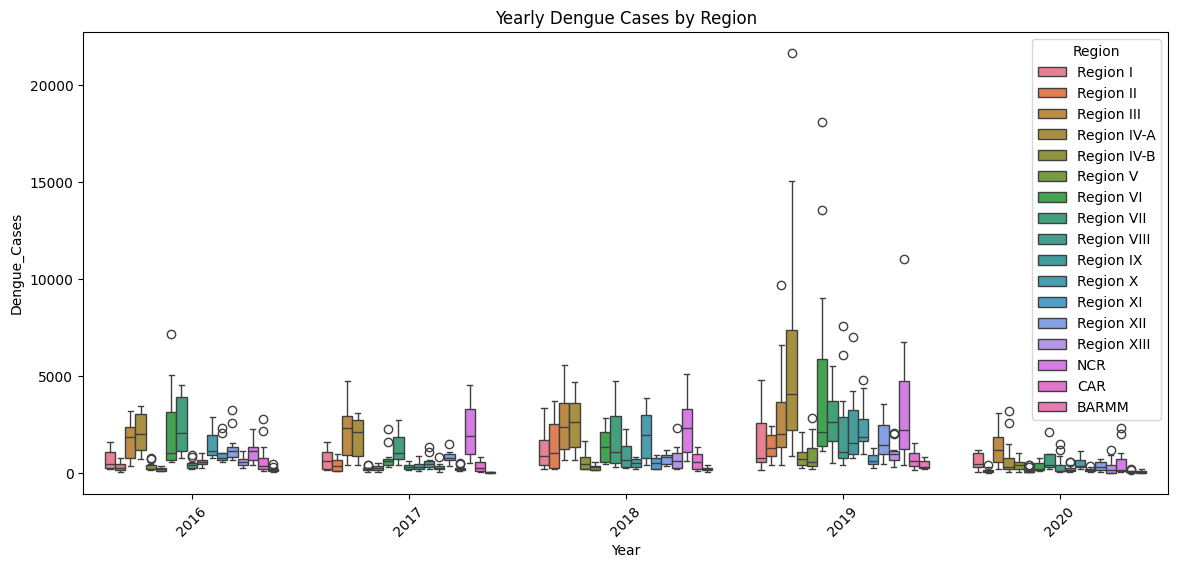

In [17]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=dengue, x="Year", y="Dengue_Cases", hue="Region")
plt.xticks(rotation=45)
plt.title("Yearly Dengue Cases by Region")
plt.show()

<h1>Insight 11: Monthly Average Dengue Cases</h1>
<h1> July to September show the highest average case counts, confirming a strong seasonal pattern. These months likely align with the rainy season, which creates favorable breeding conditions for mosquitoes.</h1>

In [18]:
monthly_avg_cases = dengue.groupby("Month")["Dengue_Cases"].mean().reindex(
    ["January", "February", "March", "April", "May", "June", 
     "July", "August", "September", "October", "November", "December"]
)

In [19]:
monthly_avg_cases

Month
January       992.094118
February      915.305882
March         677.364706
April         382.447059
May           381.023529
June          683.647059
July         1626.376471
August       2206.517647
September    2093.447059
October      1384.058824
November     1116.470588
December     1040.364706
Name: Dengue_Cases, dtype: float64

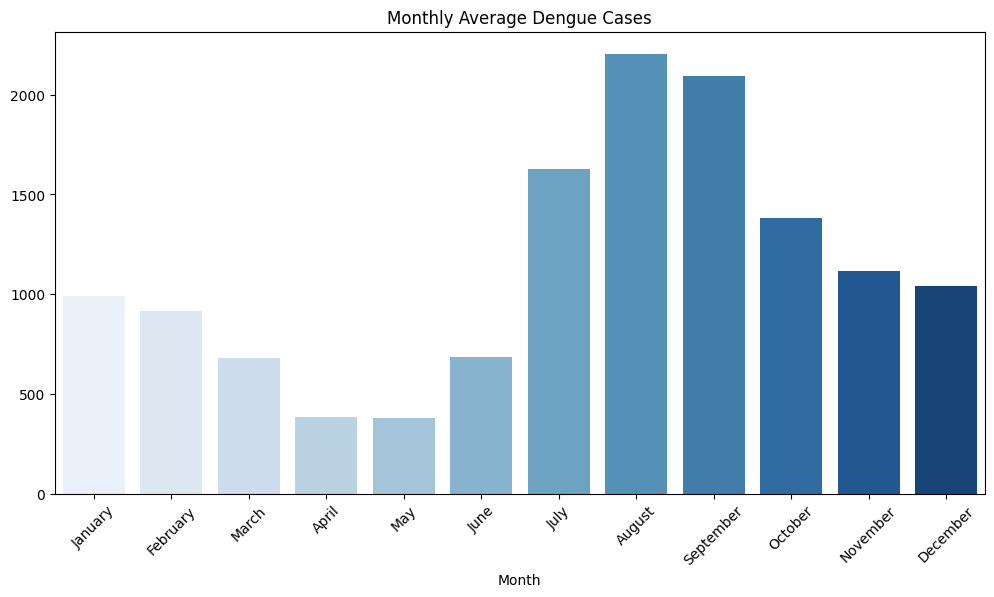

In [20]:
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_avg_cases.index, y=monthly_avg_cases.values, palette="Blues")
plt.xticks(rotation=45)
plt.title("Monthly Average Dengue Cases")
plt.show()

<h1>Insight 12: Monthly Average Dengue Deaths</h1>
<h1>Even during peak months, the average number of deaths remains low, indicating that while dengue can be deadly, fatal outcomes are relatively uncommon, especially when proper medical care is accessible.</h1>

In [21]:
monthly_avg_deaths = dengue.groupby("Month")["Dengue_Deaths"].mean().reindex(
    ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
)

In [22]:
monthly_avg_deaths

Month
January       4.635294
February      3.705882
March         3.423529
April         2.352941
May           1.905882
June          3.788235
July          7.188235
August        8.400000
September    72.329412
October      78.470588
November      7.211765
December      4.752941
Name: Dengue_Deaths, dtype: float64

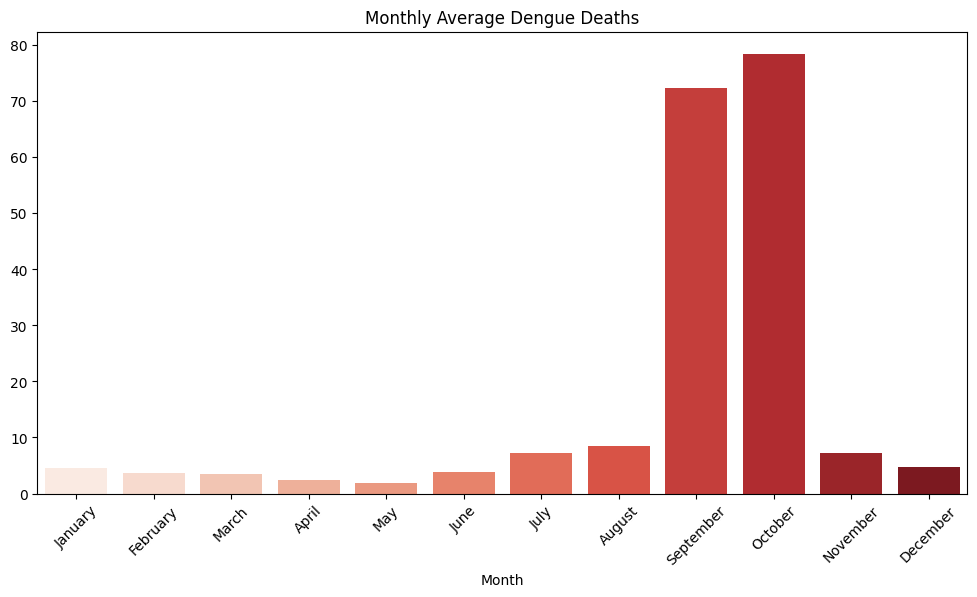

In [23]:
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_avg_deaths.index, y=monthly_avg_deaths.values, palette="Reds")
plt.xticks(rotation=45)
plt.title("Monthly Average Dengue Deaths")
plt.show()

<h1>Insight 13: Scatter Plot of Dengue Cases vs Deaths</h1>
<h1>This confirms that while an increase in cases raises the risk of deaths, the relationship is not perfectly linear—many high-case instances still result in few or no deaths. This reinforces the need for robust healthcare capacity and targeted intervention during outbreaks to keep fatality rates low.</h1>

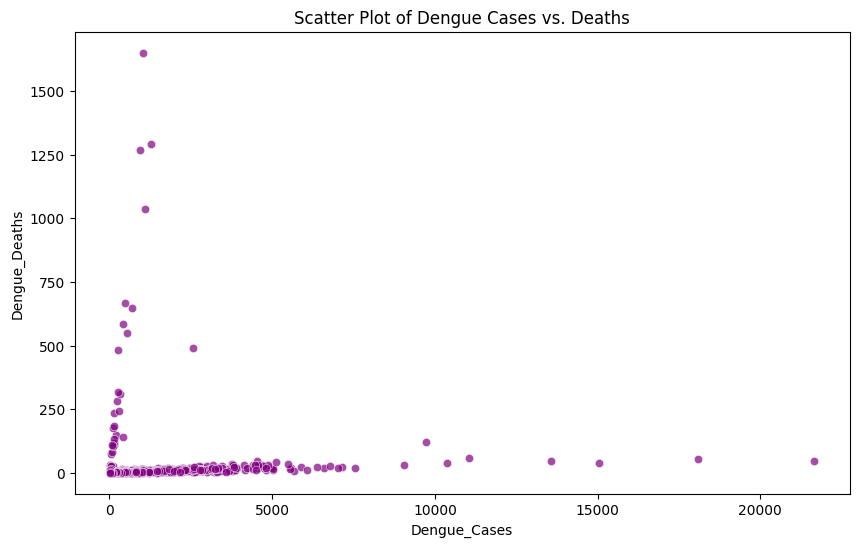

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dengue, x="Dengue_Cases", y="Dengue_Deaths", alpha=0.7, color="purple")
plt.title("Scatter Plot of Dengue Cases vs. Deaths")
plt.show()

<h1>Insight 14: Top 5 Years with Highest Dengue Cases</h1>
<h1>These five years recorded the highest overall dengue case counts, suggesting periods of particularly intense transmission or inadequate control measures.</h1>

In [26]:
top_years = dengue.groupby("Year")["Dengue_Cases"].sum().nlargest(5).reset_index()

In [27]:
top_years

,Year,Dengue_Cases
0,2019,441902
1,2018,250783
2,2016,209544
3,2017,154155
4,2020,91041


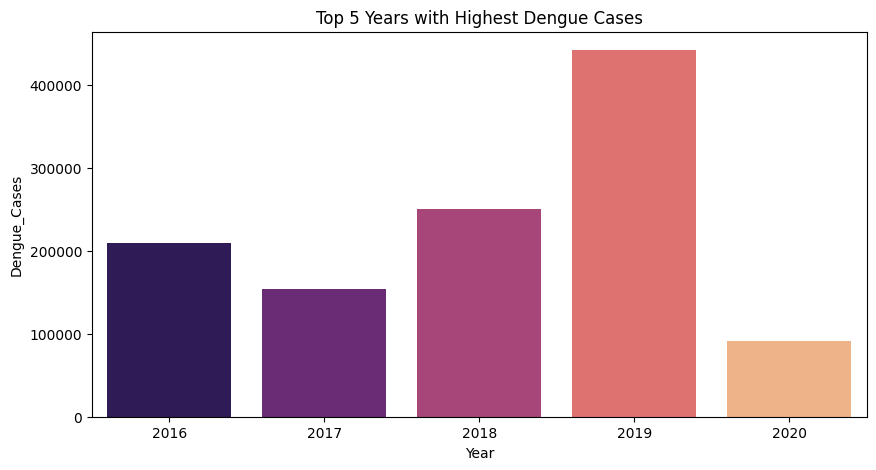

In [28]:
plt.figure(figsize=(10, 5))
sns.barplot(data=top_years, x="Year", y="Dengue_Cases", palette="magma")
plt.title("Top 5 Years with Highest Dengue Cases")
plt.show()

<h1>Insight 15: Death Rate by Year</h1>

In [ ]:
dengue["Death_Rate"] = (dengue["Dengue_Deaths"] / dengue["Dengue_Cases"]) * 100
yearly_death_rate = dengue.groupby("Year")["Death_Rate"].mean().reset_index()

In [ ]:
yearly_death_rate

In [ ]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=yearly_death_rate, x="Year", y="Death_Rate", marker="o", color="black")
plt.title("Average Death Rate by Year")
plt.ylabel("Death Rate (%)")
plt.show()